In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [2]:
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

RANDOM_SEED = 42

LABELS = ["Normal", "Fraud"]

In [3]:
# Load Train Dataset

Train=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Train_Outpatientdata-1542865627584.csv")

# Load Test Dataset

Test=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test-1542969243754.csv")
Test_Beneficiarydata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Beneficiarydata-1542969243754.csv")
Test_Inpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Inpatientdata-1542969243754.csv")
Test_Outpatientdata=pd.read_csv("/kaggle/input/healthcare-provider-fraud-detection-analysis/Test_Outpatientdata-1542969243754.csv")


In [4]:
Train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [5]:
Test.head()

,Provider
0,PRV51002
1,PRV51006
2,PRV51009
3,PRV51010
4,PRV51018


In [6]:
## Lets Check Shape of datasets 

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 25)
Shape of Train_Inpatientdata data : (40474, 30)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 25)
Shape of Test_Inpatientdata data : (9551, 30)
Shape of Test_Outpatientdata data : (125841, 27)


**Basic Data Understanding**

Train and Test Data Understanding

In [7]:
## Lets check shape of Train and Test Data

print('Train Shape:',Train.shape,'\n')
print('Train Sample:\n',Train.head(2),'\n')

print('\n Test Shape:',Test.shape,'\n')
print('Test Sample: \n',Test.head(2))

Train Shape: (5410, 2) 

Train Sample:
    Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes 


 Test Shape: (1353, 1) 

Test Sample: 
    Provider
0  PRV51002
1  PRV51006


In [8]:
## Lets check whether  providers details are unique or not in train data
print(Train.Provider.value_counts(sort=True,ascending=False).head(2))  # number of unique providers in train data.Check for duplicates

print('\n Total missing values in Train :',Train.isna().sum().sum())

print('\n Total missing values in Train :',Test.isna().sum().sum())

PRV51001    1
PRV55516    1
Name: Provider, dtype: int64

 Total missing values in Train : 0

 Total missing values in Train : 0


**Beneficiary Data Understanding**

In [9]:
#Lets Check missing values in each column in beneficiary data :

Train_Beneficiarydata.isna().sum()
Test_Beneficiarydata.isna().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

In [10]:
# Lets check data types of each column in beneficiary data

Train_Beneficiarydata.dtypes
Test_Beneficiarydata.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [11]:
##Replacing 2 with 0 for chronic conditions ,that means chroniv condition No is 0 and yes is 1

Train_Beneficiarydata = Train_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Train_Beneficiarydata = Train_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)

Test_Beneficiarydata = Test_Beneficiarydata.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [12]:
Train_Beneficiarydata.head(1)
Test_Beneficiarydata.head(1)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70


**Add Age of Person based on his/her DOD(Date of death ) and DOB (Date of Birth)**

In [13]:
## Lets Create Age column to the dataset

Train_Beneficiarydata['DOB'] = pd.to_datetime(Train_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Train_Beneficiarydata['DOD'] = pd.to_datetime(Train_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Train_Beneficiarydata['Age'] = round(((Train_Beneficiarydata['DOD'] - Train_Beneficiarydata['DOB']).dt.days)/365)


Test_Beneficiarydata['DOB'] = pd.to_datetime(Test_Beneficiarydata['DOB'] , format = '%Y-%m-%d')
Test_Beneficiarydata['DOD'] = pd.to_datetime(Test_Beneficiarydata['DOD'],format = '%Y-%m-%d',errors='ignore')
Test_Beneficiarydata['Age'] = round(((Test_Beneficiarydata['DOD'] - Test_Beneficiarydata['DOB']).dt.days)/365)

In [14]:
## As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
## so we will calculate age of other benficiaries for year 2009.

Train_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Train_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)


Test_Beneficiarydata.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Test_Beneficiarydata['DOB']).dt.days)/365),
                                 inplace=True)

In [15]:
Train_Beneficiarydata.head(2)
Test_Beneficiarydata.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,1,0,1,1,0,0,0,1490,160,69.0


**Add Flag column 'WhetherDead' using DOD values to tell whether beneficiary is dead on not**

In [16]:
#Lets create a new variable 'WhetherDead' with flag 1 means Dead and 0 means not Dead

Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Train_Beneficiarydata.loc[Train_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Train_Beneficiarydata.loc[:,'WhetherDead'].head(7)


Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.isna(),'WhetherDead']=0
Test_Beneficiarydata.loc[Test_Beneficiarydata.DOD.notna(),'WhetherDead']=1
Test_Beneficiarydata.loc[:,'WhetherDead'].head(3)

0    0.0
1    1.0
2    0.0
Name: WhetherDead, dtype: float64

In [17]:
#Lets check missing values in each column in inpatient data
Train_Inpatientdata.isna().sum()

Test_Inpatientdata.isna().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

**Create new column 'AdmitForDays' indicating number of days patient was admitted in hospita**

In [18]:
## As patient can be admitted for only for 1 day,we will add 1 to the difference of Discharge Date and Admission Date 

Train_Inpatientdata['AdmissionDt'] = pd.to_datetime(Train_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Train_Inpatientdata['DischargeDt'] = pd.to_datetime(Train_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Train_Inpatientdata['AdmitForDays'] = ((Train_Inpatientdata['DischargeDt'] - Train_Inpatientdata['AdmissionDt']).dt.days)+1


Test_Inpatientdata['AdmissionDt'] = pd.to_datetime(Test_Inpatientdata['AdmissionDt'] , format = '%Y-%m-%d')
Test_Inpatientdata['DischargeDt'] = pd.to_datetime(Test_Inpatientdata['DischargeDt'],format = '%Y-%m-%d')
Test_Inpatientdata['AdmitForDays'] = ((Test_Inpatientdata['DischargeDt'] - Test_Inpatientdata['AdmissionDt']).dt.days)+1

In [19]:
## Lets check Min and Max values of AdmitforDays column in Train and Test.
print('Min AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Train:- ',Train_Inpatientdata.AdmitForDays.max())
Train_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

print('Min AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.min())
print('Max AdmitForDays Test:- ',Test_Inpatientdata.AdmitForDays.max())
Test_Inpatientdata.AdmitForDays.isnull().sum()   #Check Null values.

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36
Min AdmitForDays Test:-  1
Max AdmitForDays Test:-  36


0

**Outpatient Data understanding**

Lets Check null values in each columnn of outpatient data

In [20]:
Train_Outpatientdata.isna().sum()

Test_Outpatientdata.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [21]:
## Lets Check Shape of datasets after adding new variables

print('Shape of Train data :',Train.shape)
print('Shape of Train_Beneficiarydata data :',Train_Beneficiarydata.shape)
print('Shape of Train_Inpatientdata data :',Train_Inpatientdata.shape)
print('Shape of Train_Outpatientdata data :',Train_Outpatientdata.shape)

print('Shape of Test data :',Test.shape)
print('Shape of Test_Beneficiarydata data :',Test_Beneficiarydata.shape)
print('Shape of Test_Inpatientdata data :',Test_Inpatientdata.shape)
print('Shape of Test_Outpatientdata data :',Test_Outpatientdata.shape)

Shape of Train data : (5410, 2)
Shape of Train_Beneficiarydata data : (138556, 27)
Shape of Train_Inpatientdata data : (40474, 31)
Shape of Train_Outpatientdata data : (517737, 27)
Shape of Test data : (1353, 1)
Shape of Test_Beneficiarydata data : (63968, 27)
Shape of Test_Inpatientdata data : (9551, 31)
Shape of Test_Outpatientdata data : (125841, 27)


**Data Merging**
## As we see columns in inpatient and outpatient data are similar, we will merge this data based on these similar keys using outer join.

In [22]:
Key_Column_To_Merge_Outpatient=Train_Outpatientdata.columns
print(Key_Column_To_Merge_Outpatient)

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')


**Merge Inpatient and Outpatinet data and create dataset for all patients.
**

In [23]:
# Lets make union of Inpatienta and outpatient data .
# We will use all keys in outpatient data as we want to make union and dont want duplicate columns from both tables.

Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


Test_Allpatientdata=pd.merge(Test_Outpatientdata,Test_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')


In [24]:
print('Train_Allpatientdata',Train_Allpatientdata.shape)
print('Test_Allpatientdata',Test_Allpatientdata.shape)

Train_Allpatientdata (558211, 31)
Test_Allpatientdata (135392, 31)


In [25]:
Train_Allpatientdata.head(4)
Test_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitForDays
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,0.0,5939,NaT,NaT,NaN,NaN


**Merge Beneficiary details to All Patients data**

In [26]:
## Lets merge All patient data with beneficiary details data based on 'BeneID' as joining key for inner join
Train_AllPatientDetailsdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

Test_AllPatientDetailsdata=pd.merge(Test_Allpatientdata,Test_Beneficiarydata,left_on='BeneID',right_on='BeneID',how='inner')

In [27]:
## Lets Print shape of data 
print('Shape of All Patient Details Train : ',Train_AllPatientDetailsdata.shape)
Train_AllPatientDetailsdata.head()

print('Shape of All Patient Details Test : ',Test_AllPatientDetailsdata.shape)
Test_AllPatientDetailsdata.head(2)

Shape of All Patient Details Train :  (558211, 57)
Shape of All Patient Details Test :  (135392, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,1,0,1,1,36000,3204,60,70,67.0,0.0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,1,0,1,1,36000,3204,60,70,67.0,0.0


**Merge PotentialFraud details for each provider to create ProviderWithPatientDetails data**

In [28]:
# Lets merge patient data with fradulent providers details data with "Provider" as joining key for inner join

Train_ProviderWithPatientDetailsdata=pd.merge(Train,Train_AllPatientDetailsdata,on='Provider')

Test_ProviderWithPatientDetailsdata=pd.merge(Test,Test_AllPatientDetailsdata,on='Provider')

In [29]:
## Lets Print the shape of dataset 
print("Shape of Train Provider with Patient Details data :-",Train_ProviderWithPatientDetailsdata.shape)
Train_ProviderWithPatientDetailsdata.head()

print("Shape of Test Provider with Patient Details data :-",Test_ProviderWithPatientDetailsdata.shape)
Test_ProviderWithPatientDetailsdata.head(2)

Shape of Train Provider with Patient Details data :- (558211, 58)
Shape of Test Provider with Patient Details data :- (135392, 57)


,Provider,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,PRV51002,BENE13342,CLM129901,2009-01-10,2009-01-10,100,PHY418314,PHY418314,PHY413853,514,...,0,0,0,0,0,0,1310,590,75.0,0.0
1,PRV51002,BENE13915,CLM163936,2009-01-29,2009-01-29,40,PHY399539,PHY421140,NaN,7840,...,1,0,0,0,22000,3204,1020,910,89.0,0.0


In [30]:
Train_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerProviderAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_Age"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['Age'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartACov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartACov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_NoOfMonths_PartBCov"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['NoOfMonths_PartBCov'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerProviderAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('Provider')['AdmitForDays'].transform('mean')

In [31]:

Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerBeneIDAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('BeneID')['AdmitForDays'].transform('mean')

In [32]:


Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerOperatingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('OperatingPhysician')['AdmitForDays'].transform('mean')

In [33]:


Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerAttendingPhysicianAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('AttendingPhysician')['AdmitForDays'].transform('mean')

In [34]:


Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmAdmitDiagnosisCodeAvg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmAdmitDiagnosisCode')['AdmitForDays'].transform('mean')

In [35]:


Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmProcedureCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmProcedureCode_1')['AdmitForDays'].transform('mean')

In [36]:


Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_1Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_1')['AdmitForDays'].transform('mean')

In [37]:


Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_2Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_2')['AdmitForDays'].transform('mean')

In [38]:


Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_3Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_3')['AdmitForDays'].transform('mean')

In [39]:


Train_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Train_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Train_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')


Test_ProviderWithPatientDetailsdata["ClmCount_Provider"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmAdmitDiagnosisCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmAdmitDiagnosisCode'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmProcedureCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmProcedureCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_2"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_2'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_3"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_3'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_4"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_4'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_5"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_5'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_6"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_6'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_7"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_7'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_8"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_8'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_ClmDiagnosisCode_9"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','ClmDiagnosisCode_9'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_DiagnosisGroupCode"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','DiagnosisGroupCode'])['ClaimID'].transform('count')

Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OtherPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OtherPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_AttendingPhysician_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','AttendingPhysician','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_OperatingPhysician"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','OperatingPhysician'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmProcedureCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1'])['ClaimID'].transform('count')
Test_ProviderWithPatientDetailsdata["ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1"]=Test_ProviderWithPatientDetailsdata.groupby(['Provider','BeneID','ClmDiagnosisCode_1','ClmProcedureCode_1'])['ClaimID'].transform('count')

In [40]:
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Train_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Train_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')


Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['InscClaimAmtReimbursed'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_DeductibleAmtPaid"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['DeductibleAmtPaid'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['IPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualReimbursementAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['OPAnnualDeductibleAmt'].transform('mean')
Test_ProviderWithPatientDetailsdata["PerClmDiagnosisCode_4Avg_AdmitForDays"]=Test_ProviderWithPatientDetailsdata.groupby('ClmDiagnosisCode_4')['AdmitForDays'].transform('mean')

In [41]:
df_train=Train_ProviderWithPatientDetailsdata.copy()
df_test=Test_ProviderWithPatientDetailsdata.copy()

In [42]:
df_train['PotentialFraud'].value_counts()

No     345415
Yes    212796
Name: PotentialFraud, dtype: int64

# the above data is skewed towards non fraudlent providers# 

In [43]:
df_train.isnull().sum()

Provider                                                  0
PotentialFraud                                            0
BeneID                                                    0
ClaimID                                                   0
ClaimStartDt                                              0
                                                      ...  
PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt    393675
PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt       393675
PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt    393675
PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt       393675
PerClmDiagnosisCode_4Avg_AdmitForDays                403151
Length: 160, dtype: int64

In [44]:
df_train['BeneID'].dtype

dtype('O')

In [45]:
df_train.drop(['AdmissionDt','DischargeDt','DOB','DOD','ClmProcedureCode_6','ClmProcedureCode_4','ClmProcedureCode_5'],inplace=True,axis=1)
df_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,...,ClmCount_Provider_BeneID_ClmProcedureCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1,ClmCount_Provider_BeneID_ClmDiagnosisCode_1_ClmProcedureCode_1,PerClmDiagnosisCode_4Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_4Avg_DeductibleAmtPaid,PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_4Avg_AdmitForDays
0,PRV51001,No,BENE11727,CLM733300,2009-12-17,2009-12-17,20,PHY383007,NaN,PHY383007,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PRV51001,No,BENE24646,CLM372475,2009-05-22,2009-05-23,700,PHY405682,NaN,PHY402512,...,NaN,1.0,NaN,2363.242273,242.469765,6945.843492,794.706138,2076.283195,599.675446,5.972381
2,PRV51001,No,BENE31617,CLM748221,2009-12-28,2009-12-28,900,PHY345302,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,PRV51001,No,BENE32715,CLM272936,2009-03-29,2009-03-30,500,PHY318842,PHY392882,NaN,...,NaN,1.0,NaN,1598.320141,158.092470,5697.304310,665.006157,1950.149516,562.396658,5.565868
4,PRV51001,No,BENE36012,CLM58316,2009-07-04,2009-07-08,36000,PHY340163,NaN,NaN,...,NaN,1.0,NaN,2376.012461,264.938967,7328.613707,813.638629,2191.090343,628.940810,5.843750


In [46]:
cat_col=[col for col in df_train.columns if df_train[col].dtype==object]
num_col=[col for col in df_train.columns if col not in cat_col]

In [47]:
len(cat_col)

22

In [48]:
df_train.isnull().sum()/len(df_train)

Provider                                             0.000000
PotentialFraud                                       0.000000
BeneID                                               0.000000
ClaimID                                              0.000000
ClaimStartDt                                         0.000000
                                                       ...   
PerClmDiagnosisCode_4Avg_IPAnnualReimbursementAmt    0.705244
PerClmDiagnosisCode_4Avg_IPAnnualDeductibleAmt       0.705244
PerClmDiagnosisCode_4Avg_OPAnnualReimbursementAmt    0.705244
PerClmDiagnosisCode_4Avg_OPAnnualDeductibleAmt       0.705244
PerClmDiagnosisCode_4Avg_AdmitForDays                0.722220
Length: 153, dtype: float64

In [49]:
pd.set_option('display.max_columns', None)
df_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,AdmitForDays,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProc

In [50]:
import datetime as dt
from datetime import timedelta

removed admission and discharge  date as they only give duration of stay but it is already a column in dataframe,and dob and dod give age and it is available in the dataframe,removing clmprocedure_6 as it is full of nan values

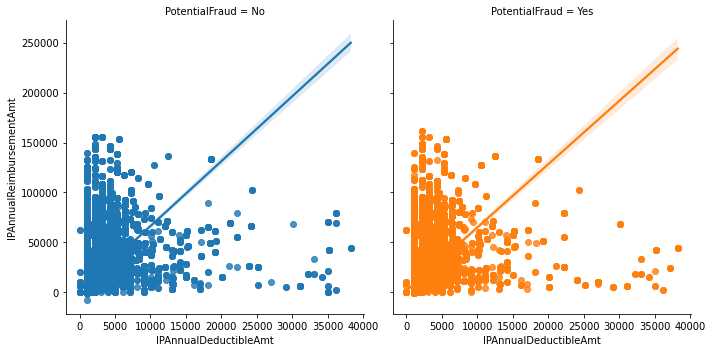

In [51]:
sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',data=df_train)

In [52]:
df_train[['NoOfMonths_PartACov','County']].head()

,NoOfMonths_PartACov,County
0,12,660
1,12,440
2,12,660
3,12,410
4,12,510


In [53]:
for col in num_col:
    df_train[col]=pd.to_numeric(df_train[col])

In [54]:
for col in num_col:
    df_train[col].fillna(-1,inplace=True)

In [55]:
pd.options.display.max_columns
df_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,AdmitForDays,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProc

In [56]:

df_train['ClaimEndDt']=pd.to_datetime(df_train['ClaimEndDt'])
df_train['ClaimStartDt']=pd.to_datetime(df_train['ClaimStartDt'])
df_train['Claimduration']=df_train['ClaimEndDt']-df_train['ClaimStartDt']

df_test['ClaimEndDt']=pd.to_datetime(df_test['ClaimEndDt'])
df_test['ClaimStartDt']=pd.to_datetime(df_test['ClaimStartDt'])
df_test['Claimduration']=df_test['ClaimEndDt']-df_test['ClaimStartDt']

In [57]:

df_train['Claim_duration_days'] = df_train['Claimduration']/timedelta(days=1)
df_test['Claim_duration_days'] = df_test['Claimduration']/timedelta(days=1)


In [58]:
import datetime as dt
df_train['claim_start_day']=df_train['ClaimStartDt'].dt.day
df_train['claim_start_month']=df_train['ClaimStartDt'].dt.month
df_train['claim_start_year']=df_train['ClaimStartDt'].dt.year

df_test['claim_start_day']=df_test['ClaimStartDt'].dt.day
df_test['claim_start_month']=df_test['ClaimStartDt'].dt.month
df_test['claim_start_year']=df_test['ClaimStartDt'].dt.year

In [59]:
df_train['claim_end_day']=df_train['ClaimEndDt'].dt.day
df_train['claim_end_month']=df_train['ClaimEndDt'].dt.month
df_train['claim_end_year']=df_train['ClaimEndDt'].dt.year

df_test['claim_end_day']=df_test['ClaimEndDt'].dt.day
df_test['claim_end_month']=df_test['ClaimEndDt'].dt.month
df_test['claim_end_year']=df_test['ClaimEndDt'].dt.year

In [60]:
print(df_train['claim_start_year'].value_counts())
df_train['claim_end_year'].value_counts()

2009    555506
2008      2705
Name: claim_start_year, dtype: int64


2009    558210
2008         1
Name: claim_end_year, dtype: int64

In [61]:
df_train.drop(['ClaimStartDt','ClaimEndDt','Claimduration'],axis=1,inplace=True)
df_test.drop(['ClaimStartDt','ClaimEndDt','Claimduration'],axis=1,inplace=True)

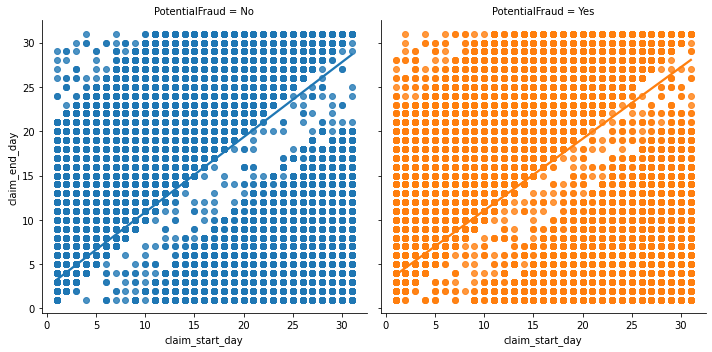

In [62]:
sns.lmplot(x='claim_start_day',y='claim_end_day',hue='PotentialFraud',
           col='PotentialFraud',data=df_train)

<AxesSubplot:xlabel='claim_start_day', ylabel='claim_end_day'>

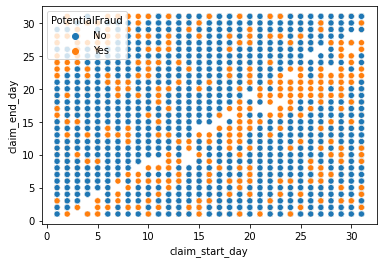

In [63]:
sns.scatterplot(x='claim_start_day',y='claim_end_day',hue='PotentialFraud',
          data=df_train)

<AxesSubplot:>

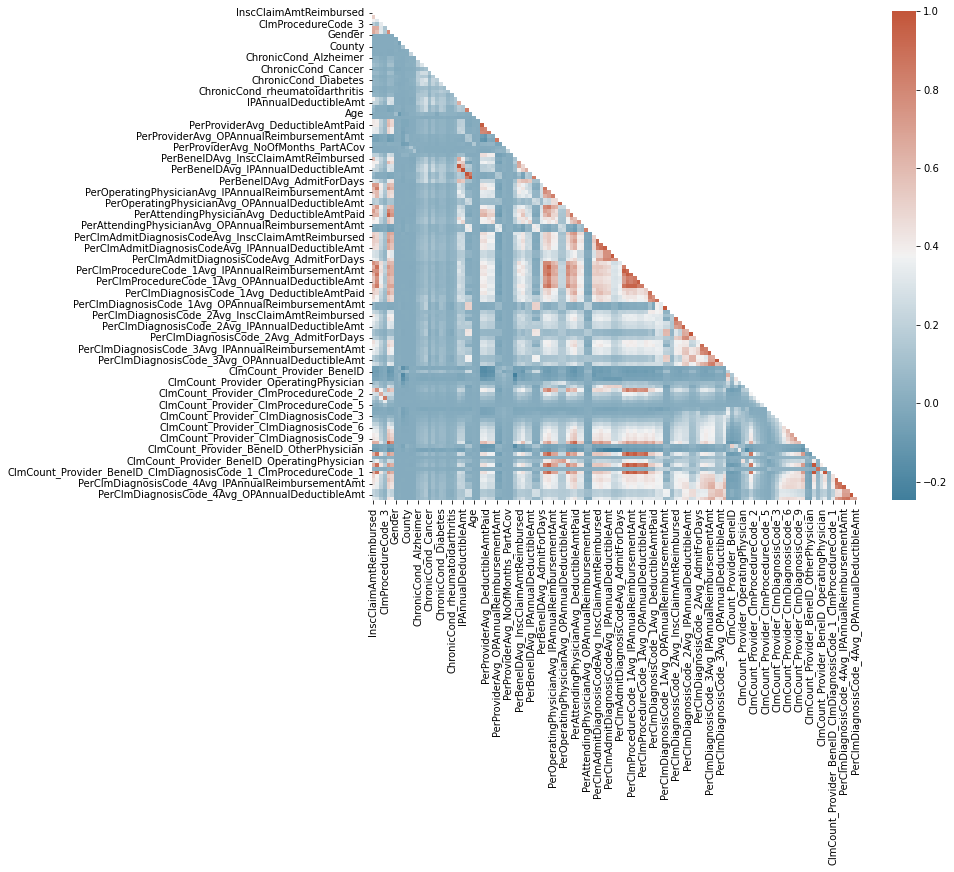

In [64]:
new=df_train[num_col].corr()
mask = np.triu(np.ones_like(new, dtype=bool))


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(new, mask=mask, cmap=cmap,square=True)

<AxesSubplot:xlabel='DeductibleAmtPaid', ylabel='AdmitForDays'>

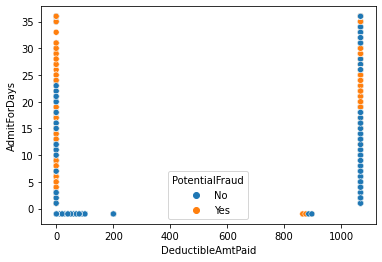

In [65]:
sns.scatterplot(x='DeductibleAmtPaid',y='AdmitForDays',hue='PotentialFraud'
          ,data=df_train)

<AxesSubplot:xlabel='OPAnnualReimbursementAmt', ylabel='OPAnnualDeductibleAmt'>

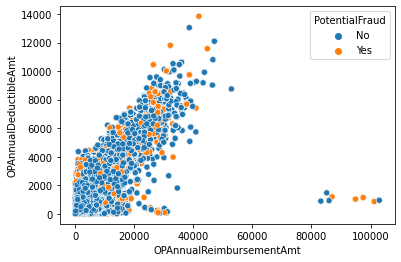

In [66]:
sns.scatterplot(x='OPAnnualReimbursementAmt',y='OPAnnualDeductibleAmt',hue='PotentialFraud',
           data=df_train)

In [67]:
df_test.drop(['AdmissionDt','DischargeDt','DOB','DOD','ClmProcedureCode_6','ClmProcedureCode_4','ClmProcedureCode_5'],inplace=True,axis=1)
df_test.head()

,Provider,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,AdmitForDays,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Provider_ClmProced

In [68]:
df_test.isnull().sum()

Provider                    0
BeneID                      0
ClaimID                     0
InscClaimAmtReimbursed      0
AttendingPhysician        347
                         ... 
claim_start_month           0
claim_start_year            0
claim_end_day               0
claim_end_month             0
claim_end_year              0
Length: 157, dtype: int64

In [69]:
for col in num_col:
    df_test[col]=pd.to_numeric(df_test[col])
for col in num_col:
    df_test[col].fillna(-1,inplace=True)

In [70]:
cat_col.remove('ClaimStartDt')
cat_col.remove('ClaimEndDt')

for col in cat_col:
    df_train[col].fillna('Nan',inplace=True)
for col in cat_col:
    if col!='PotentialFraud':
        df_test[col].fillna('Nan',inplace=True)

In [71]:
from sklearn import preprocessing
i=0
for col in cat_col:
    
    if i==len(cat_col)-1:
        break
    else:
        if col!='PotentialFraud':

            le = preprocessing.LabelEncoder()
            df_train[col]=le.fit_transform(df_train[col])
            df_test[col]=le.fit_transform(df_test[col])
        else:

            le = preprocessing.LabelEncoder()
            df_train[col]=le.fit_transform(df_train[col])
    i=i+1

In [72]:
df_train.head()

,Provider,PotentialFraud,BeneID,ClaimID,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,DeductibleAmtPaid,ClmAdmitDiagnosisCode,DiagnosisGroupCode,AdmitForDays,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PerProviderAvg_InscClaimAmtReimbursed,PerProviderAvg_DeductibleAmtPaid,PerProviderAvg_IPAnnualReimbursementAmt,PerProviderAvg_IPAnnualDeductibleAmt,PerProviderAvg_OPAnnualReimbursementAmt,PerProviderAvg_OPAnnualDeductibleAmt,PerProviderAvg_Age,PerProviderAvg_NoOfMonths_PartACov,PerProviderAvg_NoOfMonths_PartBCov,PerProviderAvg_AdmitForDays,PerBeneIDAvg_InscClaimAmtReimbursed,PerBeneIDAvg_DeductibleAmtPaid,PerBeneIDAvg_IPAnnualReimbursementAmt,PerBeneIDAvg_IPAnnualDeductibleAmt,PerBeneIDAvg_OPAnnualReimbursementAmt,PerBeneIDAvg_OPAnnualDeductibleAmt,PerBeneIDAvg_AdmitForDays,PerOperatingPhysicianAvg_InscClaimAmtReimbursed,PerOperatingPhysicianAvg_DeductibleAmtPaid,PerOperatingPhysicianAvg_IPAnnualReimbursementAmt,PerOperatingPhysicianAvg_IPAnnualDeductibleAmt,PerOperatingPhysicianAvg_OPAnnualReimbursementAmt,PerOperatingPhysicianAvg_OPAnnualDeductibleAmt,PerOperatingPhysicianAvg_AdmitForDays,PerAttendingPhysicianAvg_InscClaimAmtReimbursed,PerAttendingPhysicianAvg_DeductibleAmtPaid,PerAttendingPhysicianAvg_IPAnnualReimbursementAmt,PerAttendingPhysicianAvg_IPAnnualDeductibleAmt,PerAttendingPhysicianAvg_OPAnnualReimbursementAmt,PerAttendingPhysicianAvg_OPAnnualDeductibleAmt,PerAttendingPhysicianAvg_AdmitForDays,PerClmAdmitDiagnosisCodeAvg_InscClaimAmtReimbursed,PerClmAdmitDiagnosisCodeAvg_DeductibleAmtPaid,PerClmAdmitDiagnosisCodeAvg_IPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_IPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualReimbursementAmt,PerClmAdmitDiagnosisCodeAvg_OPAnnualDeductibleAmt,PerClmAdmitDiagnosisCodeAvg_AdmitForDays,PerClmProcedureCode_1Avg_InscClaimAmtReimbursed,PerClmProcedureCode_1Avg_DeductibleAmtPaid,PerClmProcedureCode_1Avg_IPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_IPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_OPAnnualReimbursementAmt,PerClmProcedureCode_1Avg_OPAnnualDeductibleAmt,PerClmProcedureCode_1Avg_AdmitForDays,PerClmDiagnosisCode_1Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_1Avg_DeductibleAmtPaid,PerClmDiagnosisCode_1Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_1Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_1Avg_AdmitForDays,PerClmDiagnosisCode_2Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_2Avg_DeductibleAmtPaid,PerClmDiagnosisCode_2Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_2Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_2Avg_AdmitForDays,PerClmDiagnosisCode_3Avg_InscClaimAmtReimbursed,PerClmDiagnosisCode_3Avg_DeductibleAmtPaid,PerClmDiagnosisCode_3Avg_IPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_IPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_OPAnnualReimbursementAmt,PerClmDiagnosisCode_3Avg_OPAnnualDeductibleAmt,PerClmDiagnosisCode_3Avg_AdmitForDays,ClmCount_Provider,ClmCount_Provider_BeneID,ClmCount_Provider_AttendingPhysician,ClmCount_Provider_OtherPhysician,ClmCount_Provider_OperatingPhysician,ClmCount_Provider_ClmAdmitDiagnosisCode,ClmCount_Provider_ClmProcedureCode_1,ClmCount_Pro

In [73]:
# plt.figure(figsize=(20,20))
# sns.heatmap(df_train.corr(),annot=True)

In [74]:
y=df_train['PotentialFraud']

train test split using kfold cross validation

In [75]:
df_train['RenalDiseaseIndicator']=np.array(df_train['RenalDiseaseIndicator'],dtype=np.int32)

In [76]:
from sklearn import model_selection
kf=model_selection.StratifiedKFold(n_splits=int(np.floor(1+np.log2(len(df_train)))))# struges rule for no.of splits
for f, (t_,v_) in enumerate(kf.split(X=df_train,y=y)):
    df_train.loc[v_,'kfold']=f

In [77]:
df_train=df_train.sample(frac=1).reset_index(drop=True)
df_train['kfold'].value_counts()

6.0     27911
4.0     27911
7.0     27911
3.0     27911
8.0     27911
2.0     27911
5.0     27911
0.0     27911
10.0    27911
1.0     27911
9.0     27911
16.0    27910
12.0    27910
14.0    27910
13.0    27910
18.0    27910
19.0    27910
11.0    27910
15.0    27910
17.0    27910
Name: kfold, dtype: int64

In [78]:
x_train=df_train[df_train.kfold==0]
for i in range(1,17):
    x_train=pd.concat([x_train,df_train[df_train.kfold==i]],axis=0)
x_test=pd.concat([df_train[df_train.kfold==18],df_train[df_train.kfold==19]],axis=0)
x_val=df_train[df_train.kfold==17]

In [79]:
y_train=x_train['PotentialFraud']
y_test=x_test['PotentialFraud']
y_val=x_val['PotentialFraud']

In [80]:
y_train.value_counts()

0    293605
1    180876
Name: PotentialFraud, dtype: int64

In [81]:
x_train.drop(columns=['PotentialFraud','kfold'],inplace=True)
x_test.drop(columns=['PotentialFraud','kfold'],inplace=True)
x_val.drop(columns=['PotentialFraud','kfold'],inplace=True)

In [82]:
# import numpy as np 
# mu, sigma = 0, 0.1 
# # creating a noise with the same dimension as the dataset (2,2) 
# train_noise = np.random.normal(mu, sigma, x_train.shape) 
# test_noise=np.random.normal(mu, sigma, x_test.shape) 
# x_train_noise=x_train+train_noise
# x_test_noise=x_test+test_noise

In [83]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# x_scale= MinMaxScaler()
# x_train_scale=x_scale.fit_transform(x_train_noise)
# x_test_scale=x_scale.transform(x_test_noise)
# x_val_scale=x_scale.transform(x_val)

In [84]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

oversample = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler(sampling_strategy='majority')
# sm = SMOTE(random_state=42)
# resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='minority'))
# nm = NearMiss()

In [85]:

x_train_over, y_train_over = oversample.fit_resample(x_train, y_train)
# x_train_under, y_train_under = undersample.fit_resample(x_train, y_train)

In [86]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [87]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
import lightgbm
from sklearn.linear_model import RidgeClassifier

In [88]:
rid=RidgeClassifier(alpha=0.01,fit_intercept=True).fit(x_train_over,y_train_over)
y_rid=rid.predict(x_test)
print(f1_score(y_test,y_rid))
print(accuracy_score(y_test,y_rid))

0.7690668216716317
0.829183088498746


In [89]:
# from sklearn import model_selection
# param_ridge={
# #     'alpha':[0.01,0.1,1,10,100]
# #     'fit_intercept':[True,False]
#     'normalize':[True,False]
# }
# kappa_scorer=metrics.make_scorer(
# f1_score
# )
# model_ridge=model_selection.GridSearchCV(
# estimator=rid,
# param_grid=param_ridge,
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=10
# )


In [90]:
# model_ridge.fit(x_val,y_val)
# print(model_ridge.best_score_)
# model_ridge.best_estimator_.get_params()

In [91]:
lr=LogisticRegression(C=100).fit(x_train_over,y_train_over)
y_lr=lr.predict(x_test)
print(f1_score(y_test,y_lr))
print(accuracy_score(y_test,y_lr))

0.693188422643264
0.8108563238982444


In [92]:
# param_log={
# "C":[0.001,0.01,0.1,1,10,100]
# }
# kappa_scorer=metrics.make_scorer(
# f1_score
# )
# model_lr=model_selection.GridSearchCV(
# estimator=lr,
# param_grid=param_log,
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=10
# )

In [93]:
# model_lr.fit(x_val,y_val)
# print(model_lr.best_score_)
# model_lr.best_estimator_.get_params()

In [94]:
rdf=RandomForestClassifier(max_depth=2).fit(x_train_over,y_train_over)
y_rdf=rdf.predict(x_test)
print(f1_score(y_test,y_rdf))
print(accuracy_score(y_test,y_rdf))

0.7331752963194011
0.8084378359011107


In [95]:
# param_rdf={
# # 'n_estimators':[120,300,500,800,1200]
# #     'max_depth':[5,8,15,25,30]
# #     'min_samples_split':[1,2,5,10,15,100]
# #     'min_samples_leaf':[1,2,5,10]
# #     'max_features':['log2','sqrt']
# }
# kappa_scorer=metrics.make_scorer(
# f1_score
# )
# model_rdf=model_selection.GridSearchCV(
# estimator=rdf,
# param_grid=param_rdf,
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=10
# )

In [96]:
# model_rdf.fit(x_val,y_val)
# print(model_rdf.best_score_)
# model_rdf.best_estimator_.get_params()

In [97]:
lasso = linear_model.Lasso(alpha=0.1).fit(x_train_over,y_train_over)
y_lasso=lasso.predict(x_test)
y_lasso=y_lasso>0.5
print(f1_score(y_test,y_lasso))
print(accuracy_score(y_test,y_lasso))

0.778273918453993
0.8372088857040487


In [98]:
# param_lasso={
# # 'alpha':[0.1,1,10]
#     'normalize':[True,False]
# }
# kappa_scorer=metrics.make_scorer(
# f1_score,
#     y_pred=y_pred>0.5
# )
# model_lasso=model_selection.GridSearchCV(
# estimator=lasso,
# param_grid=param_lasso,
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=10
# )

In [99]:
# model_lasso.fit(x_val,y_val)
# print(model_lasso.best_score_)
# model_lasso.best_estimator_.get_params()

In [100]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression().fit(x_train_over,y_train_over)
y_lin_reg=lin_reg.predict(x_test)
y_lin_reg=y_lin_reg>0.5
print(f1_score(y_test,y_lin_reg))
print(accuracy_score(y_test,y_lin_reg))

0.7690668216716317
0.829183088498746


In [101]:
# param_lin={
# 'fit_intercept':[True,False],
#     'normalize':[True,False]
# }
# kappa_scorer=metrics.make_scorer(
# f1_score
# )
# model_lin=model_selection.GridSearchCV(
# estimator=lin_reg,
# param_grid=param_lasso,
#     scoring=kappa_scorer,
#     cv=5,
#     verbose=10
# )

In [102]:
# model_lin.fit(x_val,y_val)
# print(model_lin.best_score_)
# model_lin.best_estimator_.get_params()

In [103]:
from sklearn.ensemble import  VotingClassifier
eclf= VotingClassifier(estimators=[('rid',rid),('lr',lr),('rdf',rdf)],voting='hard').fit(x_train_over,y_train_over)
y_eclf=eclf.predict(x_test)
print(f1_score(y_test,y_eclf))
print(accuracy_score(y_test,y_eclf))

0.7689794606753608
0.8454496596202078


In [107]:
from sklearn.metrics import roc_curve                # Calculate the ROC curve
from sklearn.metrics import precision_recall_curve   # Calculate the Precision-Recall curve
from sklearn.metrics import f1_score                 # Calculate the F-score
# Import module for data visualization
from plotnine import *
import plotnine
fpr, tpr, thresholds =roc_curve(y_test, lasso.predict(x_test),pos_label=1)     #log_val_pred_probability[:,1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.905957


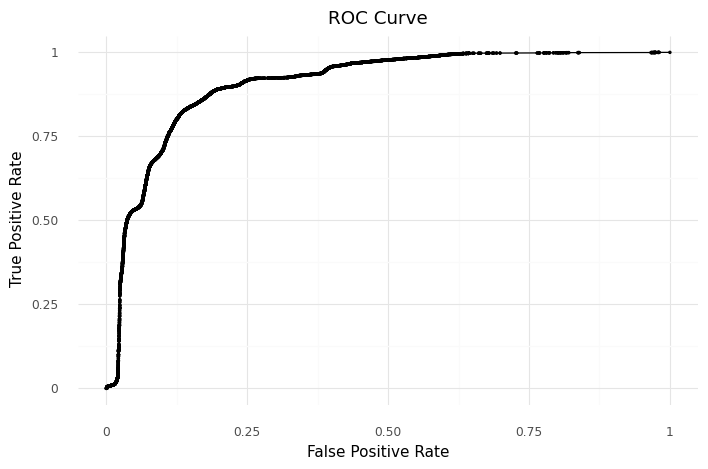

<ggplot: (8758258006913)>

In [108]:
fpr, tpr, thresholds = roc_curve(y_test, lasso.predict(x_test))

# Plot the ROC curve
df_fpr_tpr = pd.DataFrame({'FPR':fpr, 'TPR':tpr, 'Threshold':thresholds})
df_fpr_tpr.head()

# Create the data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate')+
    ylab('True Positive Rate')+
    theme_minimal()
)

finding optimal threshold with gmean

Best Threshold: 0.4415 with G-Mean: 0.8463
FPR: 0.1891, TPR: 0.8832


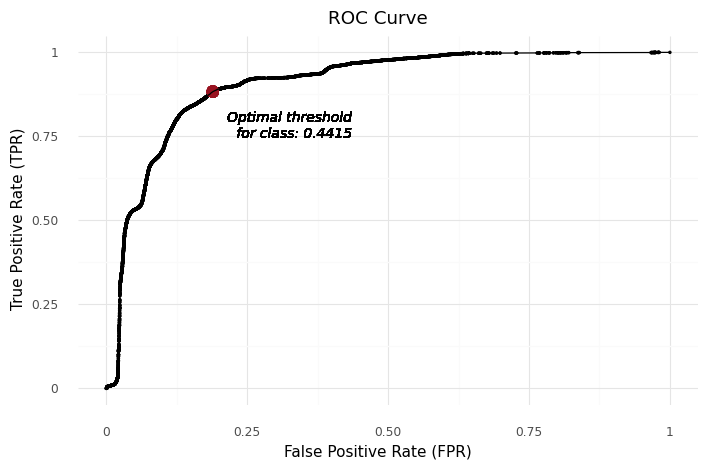

<ggplot: (8758257955877)>

In [109]:
gmean = np.sqrt(tpr * (1 - fpr))

# Find the optimal threshold
index = np.argmax(gmean)
thresholdOpt = round(thresholds[index], ndigits = 4)
gmeanOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with G-Mean: {}'.format(thresholdOpt, gmeanOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold \n for class: {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

finding optimal threshold with youdens statistic

Best Threshold: 0.4415 with Youden J statistic: 0.8463
FPR: 0.1891, TPR: 0.8832


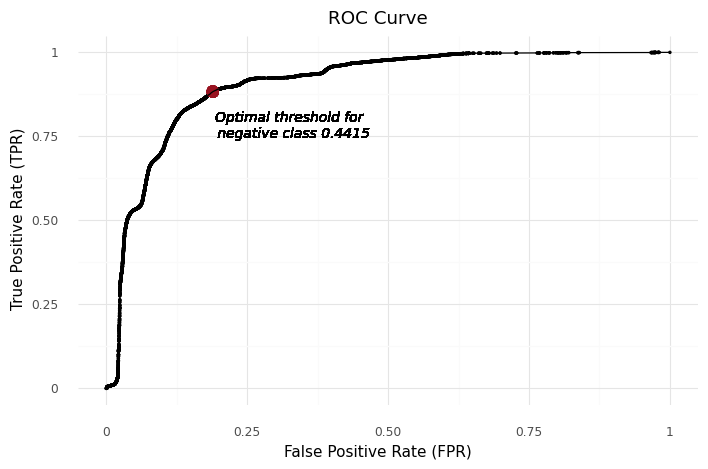

<ggplot: (8758301729309)>

In [110]:
youdenJ = tpr - fpr

# Find the optimal threshold
index = np.argmax(youdenJ)
thresholdOpt = round(thresholds[index], ndigits = 4)
youdenJOpt = round(gmean[index], ndigits = 4)
fprOpt = round(fpr[index], ndigits = 4)
tprOpt = round(tpr[index], ndigits = 4)
print('Best Threshold: {} with Youden J statistic: {}'.format(thresholdOpt, youdenJOpt))
print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

# Create a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_fpr_tpr)+
    geom_point(aes(x = 'FPR',
                   y = 'TPR'),
               size = 0.4)+
    # Best threshold
    geom_point(aes(x = fprOpt,
                   y = tprOpt),
               color = '#981220',
               size = 4)+
    geom_line(aes(x = 'FPR',
                  y = 'TPR'))+
    # Annotate the text
    geom_text(aes(x = fprOpt,
                  y = tprOpt),
              label = 'Optimal threshold for \n negative class {}'.format(thresholdOpt),
              nudge_x = 0.14,
              nudge_y = -0.10,
              size = 10,
              fontstyle = 'italic')+
    labs(title = 'ROC Curve')+
    xlab('False Positive Rate (FPR)')+
    ylab('True Positive Rate (TPR)')+
    theme_minimal()
)

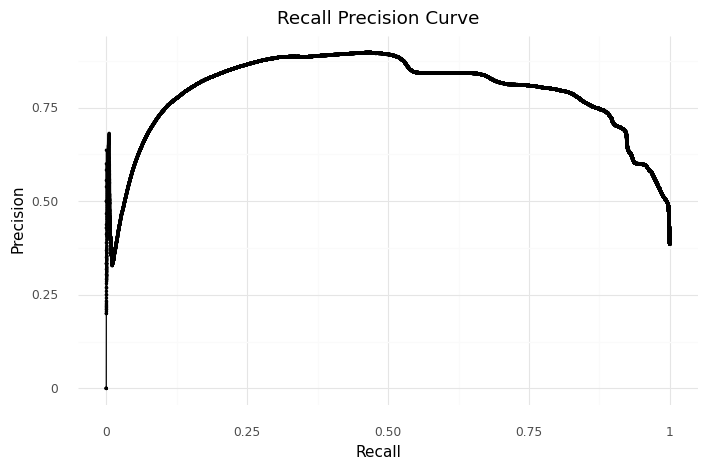

<ggplot: (8758242876281)>

In [111]:
precision, recall, thresholds = precision_recall_curve(y_test, lasso.predict(x_test))

# Plot the ROC curve
df_recall_precision = pd.DataFrame({'Precision':precision[:-1],
                                    'Recall':recall[:-1],
                                    'Threshold':thresholds})
df_recall_precision.head()

# Creat a data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_recall_precision)+
    geom_point(aes(x = 'Recall',
                   y = 'Precision'),
               size = 0.4)+
    geom_line(aes(x = 'Recall',
                  y = 'Precision'))+
    labs(title = 'Recall Precision Curve')+
    xlab('Recall')+
    ylab('Precision')+
    theme_minimal()
)

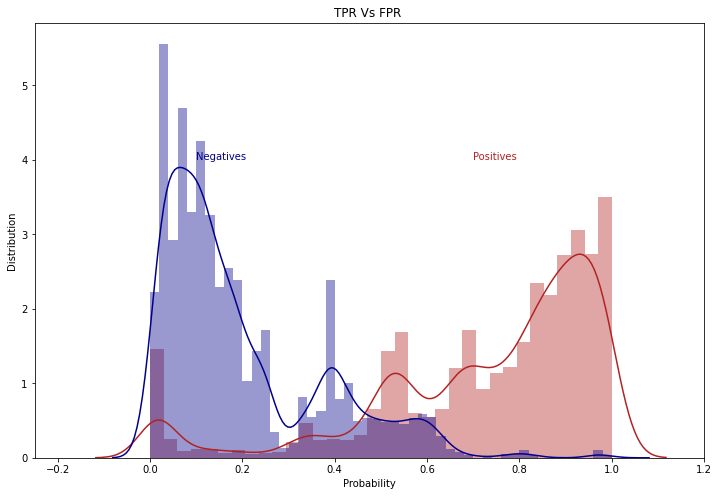

In [112]:
fig = plt.figure(figsize=(12,8))

sns.distplot(tpr,color='firebrick')

sns.distplot(fpr,color='darkblue')
plt.title('TPR Vs FPR ')
plt.xlim([-.25, 1.2])

plt.text(0.1,4,'Negatives',color='darkblue')
plt.text(0.7,4,'Positives',color='firebrick')
plt.xlabel('Probability')
plt.ylabel('Distribution')
plt.show()

we will try new threshold with 0.443

In [114]:
y_new_thres=lasso.predict(x_test)
y_new_thres=y_new_thres>thresholdOpt
from sklearn.metrics import confusion_matrix,accuracy_score,cohen_kappa_score,roc_auc_score,f1_score,auc



cm1 = confusion_matrix(y_test, y_new_thres,labels=[1,0])
print('Confusion Matrix Val: \n', cm1)


total1=sum(sum(cm1))


accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy Val: ', accuracy1)



sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity Val: ', sensitivity1 )




specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity Val: ', specificity1)

KappaValue=cohen_kappa_score(y_test, y_new_thres)
print("Kappa Value :",KappaValue)
AUC=roc_auc_score(y_test, y_new_thres)

print("AUC         :",AUC)



print("F1-Score test  : ",f1_score(y_test, y_new_thres))
print('accuracy score :',accuracy_score(y_test,y_new_thres))

Confusion Matrix Val: 
 [[18795  2485]
 [ 6532 28008]]
Accuracy Val:  0.8384629165173773
Sensitivity Val:  0.8832236842105263
Specificity Val:  0.8108859293572669
Kappa Value : 0.6696635228466619
AUC         : 0.8470548067838967
F1-Score test  :  0.8065312077584912
accuracy score : 0.8384629165173773


**we can see that after changing threshold the f1 score increased**